In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
pennsylvania_grids = gpd.read_file('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/pennsylvania_prism_grids/grids.shp')
pennsylvania_county = gpd.read_file('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/data/PA County Boundaries Spatial Data Current Transportation_20241020')

In [3]:
data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/output/emergence_reproduction_13_9C_5mm_adam_November_1991_2022_all_cyle_november_15c.csv')

In [29]:
data["geometry"] = pennsylvania_grids["geometry"]
data["lat"] = pennsylvania_grids["lat"]
data["lon"] = pennsylvania_grids["lon"]
data = gpd.GeoDataFrame(data)
data1 = data.copy()

In [30]:
def calc_wintering(data, year):
    data1 = data.copy()
    data1[f'winter_mortality_2_{year}'] = data1[f"wintering_{year}"].apply(lambda x: len([x for x in eval(x)['temps'] if x > 6.53]) * 0.0025)
    data1[f'winter_cum_deg_{year}'] = data1[f"wintering_{year}"].apply(lambda x: np.sum([x for x in eval(x)['temps'] if x > 6.53]))
    return data1

In [31]:
num_years = 32
start_year = 1991
for i in range(num_years):
    year = start_year + i
    data1[f"eggs_{year}"] = [eval(x)['eggs'] for x in data1[f"reproduction_{year}"].tolist()]
    #data1[f"larvae_mortality_{year}"] = [eval(x)['egg_mortality'] for x in data1[f"egg_larva_mortality_{year}"].tolist()]
    egg_mortlity = []
    for x in data1[f"egg_larva_mortality_{year}"].tolist():
        try:
            dt = eval(x)
            egg_mortlity.append(dt['mortality'])
        except:
            egg_mortlity.append(0)
    data1[f"larvae_mortality_{year}"] = egg_mortlity
    data1[f"larvae_cold_days_{year}"] = [eval(x)['cold_days'] for x in data1[f"egg_larva_mortality_{year}"].tolist()]
    data1[f"larvae_hot_days_{year}"] = [eval(x)['hot_days'] for x in data1[f"egg_larva_mortality_{year}"].tolist()]
    data1[f"pre_winter_mortality_{year}"] = [eval(x)['mortality'] for x in data1[f"pre_winter_{year}"].tolist()]
    data1[f"pre_winter_mortality_{year}"] = [eval(x)['mortality'] for x in data1[f"pre_winter_{year}"].tolist()]
    data1[f"winter_mortality_{year}"] = [eval(x)['mortality'] for x in data1[f"wintering_{year}"].tolist()]
    data1 = calc_wintering(data1, year)
    data1[f"eggs_1_{year}"] = (data1[f"eggs_{year}"] * (1 - data1[f"larvae_mortality_{year}"]) * (1 - data1[f"pre_winter_mortality_{year}"]) * (1 - data1[f"winter_mortality_{year}"])).astype(int)
    data1[f"eggs_2_{year}"] = (data1[f"eggs_{year}"] * (1 - data1[f"larvae_mortality_{year}"]) * (1 - data1[f"pre_winter_mortality_{year}"]) * (1 - data1[f"winter_mortality_2_{year}"])).astype(int)
    data1[f'forage_{year}'] = [eval(x)['forage_quality'] for x in data1[f"reproduction_{year}"].tolist()]
    data1[f'pre_winter_cum_deg_{year}'] = [eval(x)['cumulative_degrees'] for x in data1[f"pre_winter_{year}"].tolist()]
    #data1['winter_cum_deg'] = [eval(x)['cumulative_degrees'] for x in data1[f"wintering_{year}"].tolist()]

    

for i in range(num_years):
    year = start_year + i
    data1[f"precip_effect_{year}"] = [eval(x)['precipitation_effect'] for x in data1[f"reproduction_{year}"].tolist()]

for i in range(num_years):
    year = start_year + i
    data1[f"temp_effect_{year}"] = [eval(x)['temperature_effect'] for x in data1[f"reproduction_{year}"].tolist()]

for i in range(num_years):
    year = start_year + i
    data1[f"no_foraging_days_{year}"] = [eval(x)['non_foraging_days'] for x in data1[f"reproduction_{year}"].tolist()]

data1

/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages

,col,row,grid_id,emergence_1991,reproduction_1991,egg_larva_mortality_1991,pre_winter_1991,wintering_1991,emergence_1992,reproduction_1992,...,no_foraging_days_2013,no_foraging_days_2014,no_foraging_days_2015,no_foraging_days_2016,no_foraging_days_2017,no_foraging_days_2018,no_foraging_days_2019,no_foraging_days_2020,no_foraging_days_2021,no_foraging_days_2022
0,1083,184,1083_184,1991-05-01,"{'eggs': 11, 'non_foraging_days': 9, 'precipit...","{'cold_days': 0.09090909090909091, 'hot_days':...","{'mortality': 0.075, 'dev_days': 30, 'cumulati...","{'winter_temp': 2.261392043758389, 'mortality'...",1992-05-18,"{'eggs': 11, 'non_foraging_days': 9, 'precipit...",...,14,7,10,20,19,4,6,7,19,9
1,1084,184,1084_184,1991-04-30,"{'eggs': 10, 'non_foraging_days': 10, 'precipi...","{'cold_days': 0.1, 'hot_days': 0.0, 'mortality...","{'mortality': 0.0725, 'dev_days': 29, 'cumulat...","{'winter_temp': 2.294743807087816, 'mortality'...",1992-05-18,"{'eggs': 12, 'non_foraging_days': 8, 'precipit...",...,14,8,10,19,19,3,6,7,19,9
2,1085,184,1085_184,1991-04-28,"{'eggs': 13, 'non_foraging_days': 7, 'precipit...","{'cold_days': 1.0, 'hot_days': 0.0, 'mortality...","{'mortality': 0.0725, 'dev_days': 29, 'cumulat...","{'winter_temp': 2.3114163571316264, 'mortality...",1992-05-16,"{'eggs': 10, 'non_foraging_days': 10, 'precipi...",...,11,8,11,20,18,3,7,7,19,8
3,1086,184,1086_184,1991-04-21,"{'eggs': 9, 'non_foraging_days': 11, 'precipit...","{'cold_days': 2.3333333333333335, 'hot_days': ...","{'mortality': 0.0725, 'dev_days': 29, 'cumulat...","{'winter_temp': 2.2810565089377075, 'mortality...",1992-05-14,"{'eggs': 9, 'non_foraging_days': 11, 'precipit...",...,10,8,10,17,18,5,7,6,19,7
4,1081,185,1081_185,1991-04-30,"{'eggs': 10, 'non_foraging_days': 10, 'precipi...","{'cold_days': 0.1, 'hot_days': 0.0, 'mortality...","{'mortality': 0.075, 'dev_days': 30, 'cumulati...","{'winter_temp': 2.316050378632634, 'mortality'...",1992-05-18,"{'eggs': 11, 'non_foraging_days': 9, 'precipit...",...,14,9,12,20,17,4,6,7,19,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7447,1178,245,1178_245,1991-04-09,"{'eggs': 6, 'non_foraging_days': 14, 'precipit...","{'cold_days': 1.6666666666666667, 'hot_days': ...","{'mortality': 0.085, 'dev_days': 34, 'cumulati...","{'winter_temp': 3.9809716169429676, 'mortality...",1992-04-24,"{'eggs': 8, 'non_foraging_days': 12, 'precipit...",...,10,10,5,20,9,8,7,12,18,14
7448,1179,245,1179_245,1991-04-09,"{'eggs': 6, 'non_foraging_days': 14, 'precipit...","{'cold_days': 1.6666666666666667, 'hot_days': ...","{'mortality': 0.085, 'dev_days': 34, 'cumulati...","{'winter_temp': 4.077080186967339, 'mortality'...",1992-04-24,"{'eggs': 8, 'non_foraging_days': 12, 'precipit...",...,10,9,5,20,9,8,6,12,18,14
7449,1180,245,1180_245,1991-04-08,"{'eggs': 14, 'non_foraging_days': 13, 'precipi...","{'cold_days': 2.857142857142857, 'hot_days': 0...","{'mortality': 0.08750000000000001, 'dev_days':...","{'winter_temp': 4.187563422896053, 'mortality'...",1992-04-23,"{'eggs': 18, 'non_foraging_days': 11, 'precipi...",...,10,9,5,20,9,9,7,12,17,15
7450,1181,245,1181_245,1991-04-08,"{'eggs': 14, 'non_foraging_days': 13, 'precipi...","{'cold_days': 2.857142857142857, 'hot_days': 0...","{'mortality': 0.08750000000000001, 'dev_days':...","{'winter_temp': 4.247764568347697, 'mortality'...",1992-04-23,"{'eggs': 18, 'non_foraging_days': 11, 'precipi...",...,11,10,4,6,9,9,7,12,17,14


In [32]:
years = range(1991, 2023)
for year in years:
    data1[f"eggs_1_{year}"] = data1[f"eggs_1_{year}"].apply(lambda x: 0 if x < 0 else x)
    data1[f"eggs_2_{year}"] = data1[f"eggs_2_{year}"].apply(lambda x: 0 if x < 0 else x)

In [33]:
def getJulianDay(emergence):
    emergence = datetime.strptime(emergence, '%Y-%m-%d').date()
    starting_date = datetime.strptime(f'{emergence.year}-01-01', '%Y-%m-%d').date()
    return (emergence - starting_date).days + 1

In [80]:
data1 = pennsylvania_county[['county_nam','geometry']].sjoin(data1, how='left', op='intersects')

/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:2187: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...
Right CRS: EPSG:4269

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


In [81]:
### extract the data for each year
non_foraging_days = []
emergence_dates = []
precip_effect_days = []
temp_effect_days = []
years = []  
offsprings = []
offsprings_2 = []
cols = []
rows = []
grids = []
larvae_mortality = []
larva_cold_days = []
larva_hot_days = []
pre_winter_mortality = []
pre_winter_cum = []
winter_mortality = []
winter_mortality_2 = []
winter_cum = []
forage_quality = []
county_name = []

num_years = 32
# non_foraging_days
for i in range(num_years):
    year = 1991 + i
    # non_foraging days
    non_foraging_days.extend(data1[f"no_foraging_days_{year}"].tolist())
    years.extend([year] * len(data1[f"no_foraging_days_{year}"].tolist()))
    # emergence date
    emergence_dates.extend(data1[f"emergence_{year}"].tolist())
    # precip_effect_days
    precip_effect_days.extend(data1[f"precip_effect_{year}"].tolist())
    # temp_effect_days
    temp_effect_days.extend(data1[f"temp_effect_{year}"].tolist())
    # offsprings
    offsprings.extend(data1[f"eggs_{year}"].tolist())
    offsprings_2.extend(data1[f"eggs_2_{year}"].tolist())

    # mortality
    larvae_mortality.extend(data1[f"larvae_mortality_{year}"].tolist())
    # cold days
    larva_cold_days.extend(data1[f"larvae_cold_days_{year}"].tolist())
    # hot days
    larva_hot_days.extend(data1[f"larvae_hot_days_{year}"].tolist())
    # pre winter mortality
    pre_winter_mortality.extend(data1[f"pre_winter_mortality_{year}"].tolist())
    # pre winter cumulative
    pre_winter_cum.extend(data1[f"pre_winter_cum_deg_{year}"].tolist())
    # winter mortality
    winter_mortality.extend(data1[f"winter_mortality_{year}"].tolist())
    # winter mortality 2
    winter_mortality_2.extend(data1[f"winter_mortality_2_{year}"].tolist())
    # winter cumulative
    winter_cum.extend(data1[f"winter_cum_deg_{year}"].tolist())
    # forage quality
    forage_quality.extend(data1[f"forage_{year}"].tolist())

    cols.extend(data1['col'].tolist())
    rows.extend(data1['row'].tolist())
    grids.extend(data1['grid_id'].tolist())

    county_name.extend(data1['county_nam'].tolist())

    #lat.extend(data1['lat'].tolist())
    #lon.extend(data1['lon'].tolist())

In [82]:
df_pa = pd.DataFrame({'Year': years, 'NonForagingDays': non_foraging_days, 'Emergence': emergence_dates, 'PrecipEffectDays': precip_effect_days, 'TempEffectDays': temp_effect_days, 'Offsprings': offsprings, 'Offsprings_2': offsprings_2, 'LarvaeMortality': larvae_mortality, 'LarvaeColdDays': larva_cold_days, 'LarvaeHotDays': larva_hot_days, 'PreWinterMortality': pre_winter_mortality, 'PreWinterCumulative': pre_winter_cum, 'WinterMortality': winter_mortality, 'WinterMortality2': winter_mortality_2, 'WinterCumulative': winter_cum, 'Col': cols, 'Row': rows, 'GridId': grids, 'forage': forage_quality, 'CountyName': county_name})

In [88]:
data1['pre_winter_1991']

0     {'mortality': 0.09, 'dev_days': 36, 'cumulativ...
0     {'mortality': 0.095, 'dev_days': 38, 'cumulati...
0     {'mortality': 0.085, 'dev_days': 34, 'cumulati...
0     {'mortality': 0.085, 'dev_days': 34, 'cumulati...
0     {'mortality': 0.0925, 'dev_days': 37, 'cumulat...
                            ...                        
66    {'mortality': 0.0725, 'dev_days': 29, 'cumulat...
66    {'mortality': 0.0725, 'dev_days': 29, 'cumulat...
66    {'mortality': 0.07, 'dev_days': 28, 'cumulativ...
66    {'mortality': 0.0725, 'dev_days': 29, 'cumulat...
66    {'mortality': 0.07, 'dev_days': 28, 'cumulativ...
Name: pre_winter_1991, Length: 7166, dtype: object

In [92]:
vals = df_pa['PreWinterMortality'] * 100

(array([2.8000e+01, 3.2000e+02, 1.7460e+03, 9.5430e+03, 1.4912e+04,
        1.1739e+04, 2.2748e+04, 2.0864e+04, 3.4103e+04, 3.6096e+04,
        1.8792e+04, 2.3316e+04, 1.2687e+04, 1.1369e+04, 6.3430e+03,
        2.1730e+03, 1.9000e+03, 4.6600e+02, 1.1900e+02, 4.8000e+01]),
 array([ 0.75,  1.4 ,  2.05,  2.7 ,  3.35,  4.  ,  4.65,  5.3 ,  5.95,
         6.6 ,  7.25,  7.9 ,  8.55,  9.2 ,  9.85, 10.5 , 11.15, 11.8 ,
        12.45, 13.1 , 13.75]),
 <BarContainer object of 20 artists>)

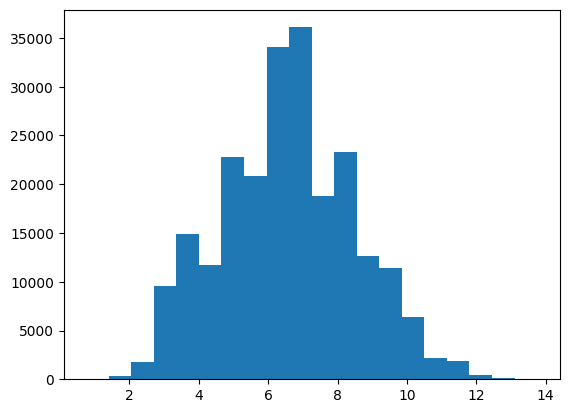

In [93]:
plt.hist(vals, bins=20)

(array([4.3430e+03, 1.5394e+04, 2.9767e+04, 3.6690e+04, 3.5770e+04,
        3.1584e+04, 2.4832e+04, 1.8562e+04, 1.1774e+04, 8.4600e+03,
        5.0510e+03, 3.3960e+03, 2.2100e+03, 9.8300e+02, 2.9400e+02,
        1.1100e+02, 5.7000e+01, 1.5000e+01, 1.2000e+01, 7.0000e+00]),
 array([  626.3001442 ,  2469.94042873,  4313.58071327,  6157.22099781,
         8000.86128235,  9844.50156689, 11688.14185143, 13531.78213596,
        15375.4224205 , 17219.06270504, 19062.70298958, 20906.34327412,
        22749.98355865, 24593.62384319, 26437.26412773, 28280.90441227,
        30124.54469681, 31968.18498135, 33811.82526588, 35655.46555042,
        37499.10583496]),
 <BarContainer object of 20 artists>)

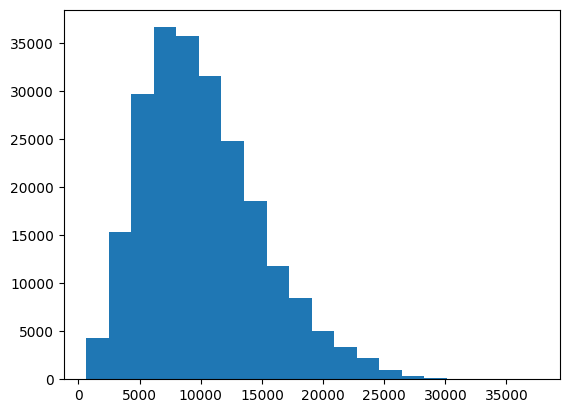

In [95]:
vals = df_pa['PreWinterCumulative'] * 100
plt.hist(vals, bins=20)

In [96]:
df_pa

,Year,NonForagingDays,Emergence,PrecipEffectDays,TempEffectDays,Offsprings,Offsprings_2,LarvaeMortality,LarvaeColdDays,LarvaeHotDays,PreWinterMortality,PreWinterCumulative,WinterMortality,WinterMortality2,WinterCumulative,Col,Row,GridId,forage,CountyName
0,1991,14,1991-03-30,2,14,6,1,0.766667,7.666667,0.0,0.0900,188.266025,0.0,0.1375,571.756026,1193,238,1193_238,0.471875,MONTGOMERY
1,1991,20,1991-03-29,20,20,0,0,0.000000,0.000000,0.0,0.0950,198.963034,0.0,0.1375,571.049027,1194,238,1194_238,0.500000,MONTGOMERY
2,1991,13,1991-04-09,5,13,14,9,0.142857,1.428571,0.0,0.0850,166.326031,0.0,0.1375,572.294024,1192,237,1192_237,0.531250,MONTGOMERY
3,1991,12,1991-04-08,5,12,16,9,0.237500,2.375000,0.0,0.0850,177.439034,0.0,0.1425,591.392027,1193,237,1193_237,0.571875,MONTGOMERY
4,1991,14,1991-03-30,2,14,6,1,0.766667,7.666667,0.0,0.0925,195.003036,0.0,0.1400,581.885026,1194,237,1194_237,0.487500,MONTGOMERY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229307,2022,8,2022-05-06,2,7,12,10,0.000000,0.000000,0.0,0.0600,97.476583,0.0,0.1100,497.969385,1113,235,1113_235,0.434375,BEDFORD
229308,2022,9,2022-05-05,3,8,22,18,0.000000,0.000000,0.0,0.0600,99.731794,0.0,0.1125,509.480690,1113,234,1113_234,0.537500,BEDFORD
229309,2022,9,2022-05-07,3,6,22,18,0.000000,0.000000,0.0,0.0600,90.811790,0.0,0.1075,490.000087,1112,234,1112_234,0.631250,BEDFORD
229310,2022,9,2022-05-05,3,8,22,18,0.000000,0.000000,0.0,0.0600,102.914586,0.0,0.1100,496.607687,1114,234,1114_234,0.531250,BEDFORD


In [97]:
df_pa['PreWinterMortality'].corr(df_pa['PreWinterCumulative'])

0.8903370036426368

In [ ]:
years = range(1991, 2022)
data1['total_eggs'] = [sum([data1[f'eggs_1_{year}'][i] for year in years]) for i in range(len(data1))]
data1['avg_eggs'] = [np.mean([data1[f'eggs_1_{year}'][i] for year in years]) for i in range(len(data1))]